Calcularemos soluciones numéricas de la segunda ecuación de Friedmann:

$
\frac{\ddot{a}}{a} = -H_0^2\left( \frac{1}{2}\Omega_m^{0}a^{-3} + \Omega_r^{0}a^{-4} - \Omega_\Lambda^{0} \right)
$

Pasando $a$ multiplicando se llega a

$
\ddot{a} = -H_0^2\left( \frac{1}{2}\Omega_m^{0}a^{-2} + \Omega_r^{0}a^{-3} - \Omega_\Lambda^{0}a \right)
$

Convertimos la EDO de segundo orden en un sistema de EDOs de primer orden con $u = a, v = \dot{a}$

$
\begin{cases}
\dot{u} = v\\
\dot{v} = -H_0^2\left( \frac{1}{2}\Omega_m^{0}u^{-2} + \Omega_r^{0}u^{-3} - \Omega_\Lambda^{0}u \right)\\
u(t_0) = 1\\
v(t_0) = H_0
\end{cases}
$

In [4]:
from scipy.integrate import solve_ivp #Solver de ecuaciones diferenciales
import matplotlib.pyplot as plt

KM_MP = 3.24078E-20    #Conversion de Kilometro a Megaparsec
S_GYEAR = 3.17098E-17  #Conversion de Segundo a G_año (mil millones de años)

In [2]:
#omega_m : densidad de materia (barionica + oscura)
#omega_r : densidad de radiacion
#omega_l : constante cosmologica
#H0      : constante de Hubble
#w       : parametro de ecuacion de estado de energia oscura (valor estandar w=-1)

class Universe:
    
    def __init__(self, parameters, H0 = 67.5017):
        
        self.name = parameters["name"]
        self.omega_m = parameters["omega_m"]
        self.omega_r = parameters["omega_r"]
        self.omega_l = parameters["omega_l"]
        self.H0 = parameters["H0"]
        self.w = parameters["w"]
        self.omega_0 = self.omega_m + self.omega_r + self.omega_l
        self.age = 0
    
        self.H0_p = (self.H0 * KM_MP) / S_GYEAR #Reescalo H0 para que los graficos queden en G_años
        self.age = None
        
        #Sistema de ecuaciones de aceleración
        #t: tiempo
        #z: ecuaciones (u=a,v=a') a escala de tamaño
    def Friedmann_2(self, t, z):
        u,v = z
        return [v, -self.H0_p**2*((self.omega_m/2)*(u**-2) + self.omega_r*(u**-3) - self.omega_l*u)]
    
        #Función para el solver "solve_ivp" para que guarde valor de t para el cual la función vale 1 (edad actual)
    def current_age(self,t,a):
        return a[0] - 1
    
        #a0: valor inicial de escala del universo en el tiempo actual
        #method: metodo del solver para resolver la ecuacion diferencial
        #age_stop: edad en G_años a la que parar la simulación
    def simulate_Friedmann_2(self,a0 = 1,  method = 'RK23', age_stop_f = 20, age_stop_b = 20):
        t_range_f = [0, age_stop_f]
        t_range_b = [0, -age_stop_b]
        a0 = 1
        
        #Cálculo numérico partiendo del tiempo actual hacia el futuro
        self.simulation_Friedmann_2_f = solve_ivp(self.Friedmann_2, t_range_f, [a0, self.H0_p], method = method, rtol= 1E-5, atol = 1E-5)

        #Cálculo numérico partiendo del tiempo actual hacia el pasado
        self.simulation_Friedmann_2_b = solve_ivp(self.Friedmann_2, t_range_b, [a0, self.H0_p], method = method, rtol= 1E-5, atol = 1E-5)

        self.age = -self.simulation_Friedmann_2_b.t[-1]

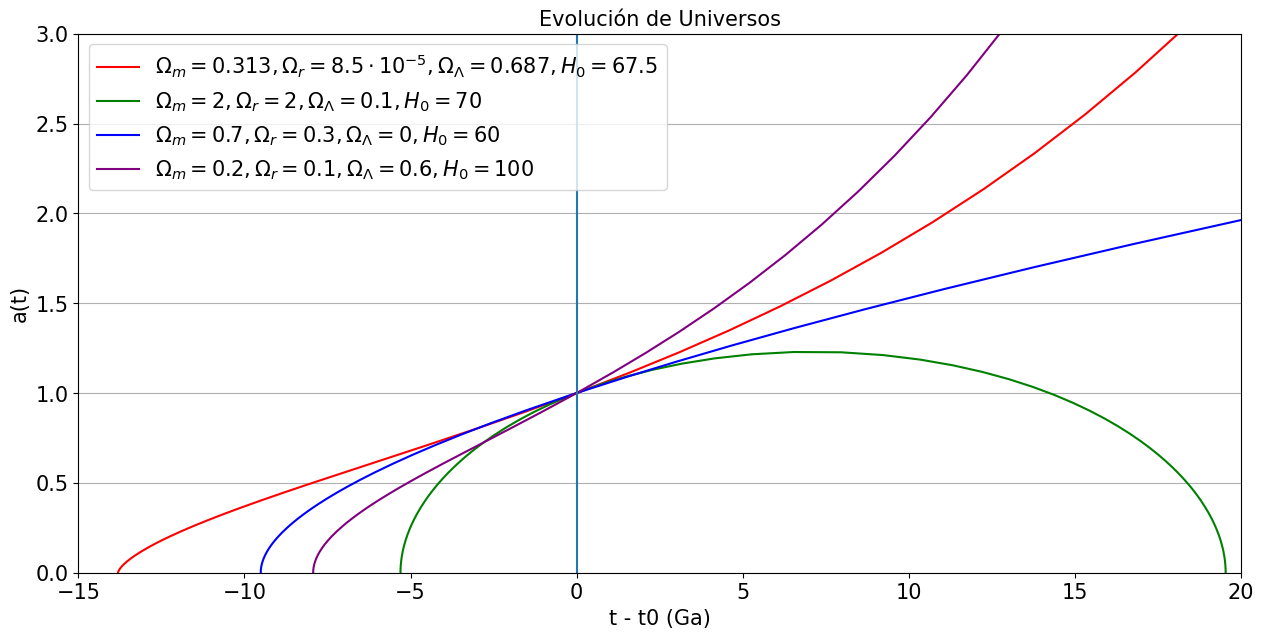

In [3]:
#Universo con mediciones de Planck
parameters_u1 = {
    "omega_m" : 0.313,
    "omega_r" : 8.5E-5,
    "omega_l" : 0.687,
    "H0" : 67.5,
    "w" : -1,
    "name" : "Planck"
}

#Universo de curvatura positva
parameters_u2 = {
    "omega_m" : 2,
    "omega_r" : 2,
    "omega_l" : 0.1,
    "H0" : 70,
    "w" : -1,
    "name" : "Closed_universe"
}

#Universo plano
parameters_u3 = {
    "omega_m" : 0.7,
    "omega_r" : 0.3,
    "omega_l" : 0,
    "H0" : 60,
    "w" : -1,
    "name" : "Flat_universe"
}

#Universo de curvatura negativa
parameters_u4 = {
    "omega_m" : 0.2,
    "omega_r" : 0.1,
    "omega_l" : 0.6,
    "H0" : 100,
    "w" : -1,
    "name" : "Open_universe"
}

#Definimos los universos
u1 = Universe(parameters_u1)
u2 = Universe(parameters_u2)
u3 = Universe(parameters_u3)
u4 = Universe(parameters_u4)

#Calculamos las soluciones numéricas
u1.simulate_Friedmann_2(age_stop_b=20, age_stop_f = 25)
u2.simulate_Friedmann_2(age_stop_b=20, age_stop_f = 25)
u3.simulate_Friedmann_2(age_stop_b=20, age_stop_f = 25)
u4.simulate_Friedmann_2(age_stop_b=20, age_stop_f = 25)


#Dibujamos las gráficas
plt.figure(figsize=(15,7), dpi = 100) 
plt.title("Evolución de Universos", fontsize = 15)
plt.xlabel("t - t0 (Ga)", fontsize = 15)
plt.ylabel("a(t)", fontsize = 15)

plt.plot(u1.simulation_Friedmann_2_f.t, u1.simulation_Friedmann_2_f.y[0], color='red', label = "$\Omega_m = 0.313, \Omega_r = 8.5\cdot10^{-5}, \Omega_\Lambda = 0.687, H_0 = 67.5$")
plt.plot(u1.simulation_Friedmann_2_b.t, u1.simulation_Friedmann_2_b.y[0], color='red')

plt.plot(u2.simulation_Friedmann_2_f.t, u2.simulation_Friedmann_2_f.y[0], color='green', label = "$\Omega_m = 2, \Omega_r = 2, \Omega_\Lambda = 0.1, H_0 = 70$")
plt.plot(u2.simulation_Friedmann_2_b.t, u2.simulation_Friedmann_2_b.y[0], color='green')

plt.plot(u3.simulation_Friedmann_2_f.t, u3.simulation_Friedmann_2_f.y[0], color='blue', label = "$\Omega_m = 0.7, \Omega_r = 0.3, \Omega_\Lambda = 0, H_0 = 60$")
plt.plot(u3.simulation_Friedmann_2_b.t, u3.simulation_Friedmann_2_b.y[0], color='blue')

plt.plot(u4.simulation_Friedmann_2_f.t, u4.simulation_Friedmann_2_f.y[0], color='purple', label = "$\Omega_m = 0.2, \Omega_r = 0.1, \Omega_\Lambda = 0.6, H_0 = 100$")
plt.plot(u4.simulation_Friedmann_2_b.t, u4.simulation_Friedmann_2_b.y[0], color='purple')

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="best", fontsize = 15)
plt.axvline(0)
plt.grid(axis="y")
plt.xlim([-15,20])
plt.ylim([0,3])
plt.show()